# Parkinsons Disease


| Method    |  Accuracy (%)  | F1-Score (%) | Recall (%) |
|-----------|---------|-----------|---------|
| **Random Forest**   | **97.44**   | **98.41** | **100.00** |
| XGBoost | 89.74   | 93.94 | **100.00** |
| SVM | 89.74   | 93.33 | 90.32 |
___



### Import Libraries and Dataset

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for numerical analysis

# For plottling graphs
import seaborn as sns 
import matplotlib.pyplot as plt

# for saving tools
import joblib

C:\Users\public\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\madhu\AppData\Local\Temp\ipykernel_13276\2397419954.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # for data manipulation


In [2]:
# Setting Plotting Settings
%matplotlib inline
sns.set_style("darkgrid")

Import Dataset

In [3]:
parkinsons = pd.read_csv("parkinsons.csv")

In [4]:
# Checking First 5 rows of data
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking basic information about the dataset

In [5]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Data Preprocessing

#### Data Shuffle and Split
It is good pratice to split the dataset before preprocessing to avoid data leakage, shuffling the data adds randomness which can boost model performance

In [7]:
# Shuffling the data
parkinsons = parkinsons.sample(frac=1, random_state=42).copy()

In [8]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X = parkinsons.drop(["name", "status"], axis=1) 
y = parkinsons["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [9]:
# Setting the train data to variable name "parkinsons" for data preprocessing
parkinsons = X_train.copy()
parkinsons

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
110,200.714,223.982,89.686,0.00621,0.00003,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
38,180.198,201.249,175.456,0.00284,0.00002,0.00153,0.00166,0.00459,0.01444,0.131,...,0.01190,0.02177,0.00231,26.738,0.403884,0.766209,-6.452058,0.212294,2.269398,0.141929
149,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.06460,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
119,217.116,233.481,93.978,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.124,...,0.01075,0.02038,0.00681,24.581,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
103,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958


In [10]:
y_train

110    1
38     1
149    1
111    1
119    1
      ..
125    1
103    1
13     1
69     1
51     0
Name: status, Length: 156, dtype: int64

In [11]:
parkinsons.iloc[0]

MDVP:Fo(Hz)         200.714000
MDVP:Fhi(Hz)        223.982000
MDVP:Flo(Hz)         89.686000
MDVP:Jitter(%)        0.006210
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.003710
MDVP:PPQ              0.003370
Jitter:DDP            0.011120
MDVP:Shimmer          0.022860
MDVP:Shimmer(dB)      0.207000
Shimmer:APQ3          0.011920
Shimmer:APQ5          0.014390
MDVP:APQ              0.018520
Shimmer:DDA           0.035760
NHR                   0.007040
HNR                  23.239000
RPDE                  0.436084
DFA                   0.727863
spread1              -5.258320
spread2               0.256454
D2                    2.550961
PPE                   0.232520
Name: 110, dtype: float64

#### Handling of Missing data 


In [12]:
# Extracting features
features = [feature for feature in parkinsons.columns]

There is no missing data in this dataset

In [13]:
# Check total of missing values
parkinsons.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### Feature Scaling
Scaling values to a range of -3 to 3, so as to boost model perfomance

In [14]:
# import library for scaling
from sklearn.preprocessing import StandardScaler

In [15]:
# initialize and scale values
scaler = StandardScaler()
scaler.fit(parkinsons[features])
parkinsons[features] = scaler.transform(parkinsons[features])

In [50]:
joblib.dump(scaler, "Saved Models/scaler_joblib")

['Saved Models/scaler_joblib']

### Class Imbalance

In [18]:
#  Ratio of No Parkinson to Parkinson
y_train.value_counts(normalize=True)

status
1    0.74359
0    0.25641
Name: proportion, dtype: float64

In [19]:
# joining the data together
parkinsons = pd.concat([parkinsons, y_train], axis=1)

In [20]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=51)
X = parkinsons.drop("status", axis=1) 
y = parkinsons["status"]
X_train, y_train = smote.fit_resample(X, y)

In [21]:
#  Ratio of No Diabetes to Diabetes
y_train.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

### Model Building

#### Preprocessing Test data

In [22]:
X_test[features] = scaler.transform(X_test[features]) # scaling features

In [23]:
# checking first 5 rows of data
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
178,-0.151432,-0.447968,0.531967,-0.627798,-0.672123,-0.581369,-0.560485,-0.581443,-0.705749,-0.689308,...,-0.619726,-0.677014,-0.479478,0.519697,-0.883598,0.798224,-0.550574,-0.517415,-0.323720,-0.483962
171,-1.039602,-0.700585,-0.238230,-0.537601,-0.392743,-0.536514,-0.546879,-0.535520,-0.818315,-0.754158,...,-0.717257,-0.846283,-0.491718,0.958974,-0.782484,0.693933,-0.561047,-0.078752,-0.470999,-0.483204
137,-1.024432,-0.731969,-0.354934,-0.249362,-0.113364,-0.244957,-0.131912,-0.243967,1.225079,0.976850,...,1.010606,1.308839,0.260061,-1.143867,1.220770,-0.169468,0.952868,0.947541,0.742242,0.751637
15,-0.313735,0.149539,-0.760321,-0.510150,-0.392743,-0.565350,-0.502661,-0.565423,-0.742750,-0.769124,...,-0.590870,-0.742018,-0.398410,0.685294,0.659299,-1.073972,0.331183,-0.183522,-0.440262,0.320589
157,-0.906877,-0.692143,-0.352990,2.321258,2.959811,2.510423,1.249044,2.510302,1.033820,0.787287,...,0.307688,1.032409,1.890187,-0.638612,1.269749,-1.279736,2.051050,0.936787,1.482436,0.609947


In [24]:
X_test.shape

(39, 22)

#### Random Forest

Import Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(random_state=51, n_jobs=-1)

Train model and make predictions

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [28]:
predictions = model.predict(X_test)

#### RF Performance

In [29]:
# libraries to check performance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  recall_score

In [30]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 97.44 %
The f1 score is 98.41 %
The recall is 100.00 %


Confusion matrix

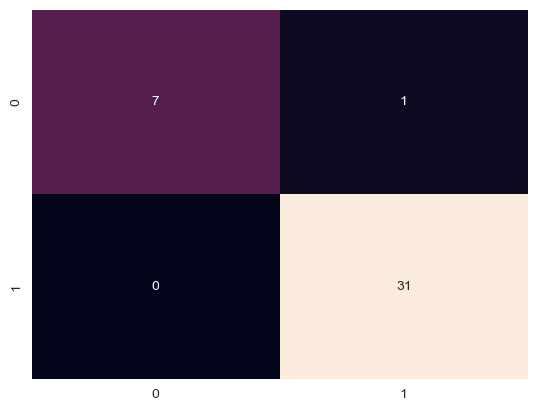

In [31]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

XGboost

Import Model

In [32]:
from xgboost import XGBClassifier

In [33]:
xgb = XGBClassifier(random_state=51)

Train model and make predictions

In [35]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=51, ...)

In [36]:
predictions = xgb.predict(X_test)

#### XGBoost Performance

In [37]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 89.74 %
The f1 score is 93.94 %
The recall is 100.00 %


Confusion Matrix

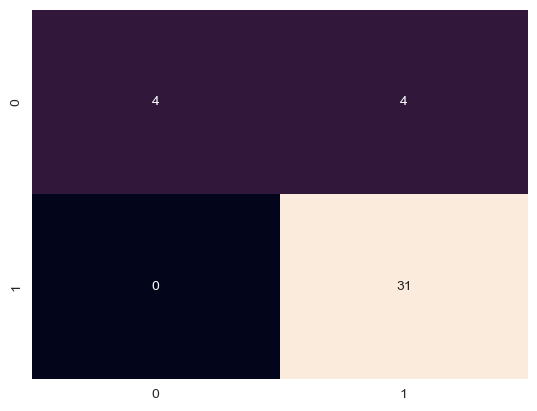

In [38]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### SVM

Import Model

In [39]:
from sklearn.svm import SVC

In [40]:
svm = SVC()

Train model and make predictions

In [41]:
svm.fit(X_train, y_train)

SVC()

In [42]:
predictions = svm.predict(X_test)

#### SVM Performance

In [43]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 89.74 %
The f1 score is 93.33 %
The recall is 90.32 %


Confusion Matrix

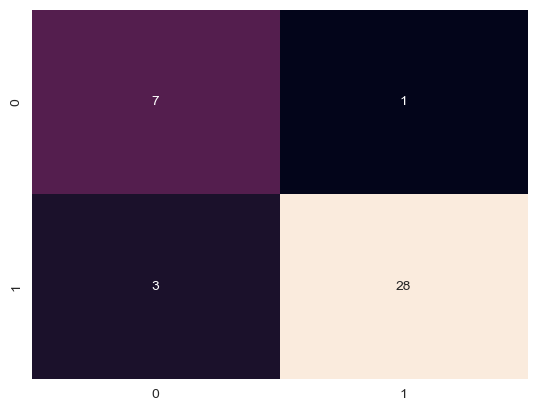

In [44]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### Most important features
Here we check the top 10 most important features that contribute to the prediction of parkinsons
* spread1
* MDVP:Fo(Hz)
* PPE
* MDVP:Fhi(Hz)
* spread2
* MDVP:APQ
* MDVP:Flo(Hz)
* Shimmer:APQ5
* MDVP:PPQ
* MDVP:Shimmer


In [45]:
importance_df = pd.DataFrame({
    "Feature" : features,
    "Importance" : model.feature_importances_}).sort_values("Importance", ascending=False)

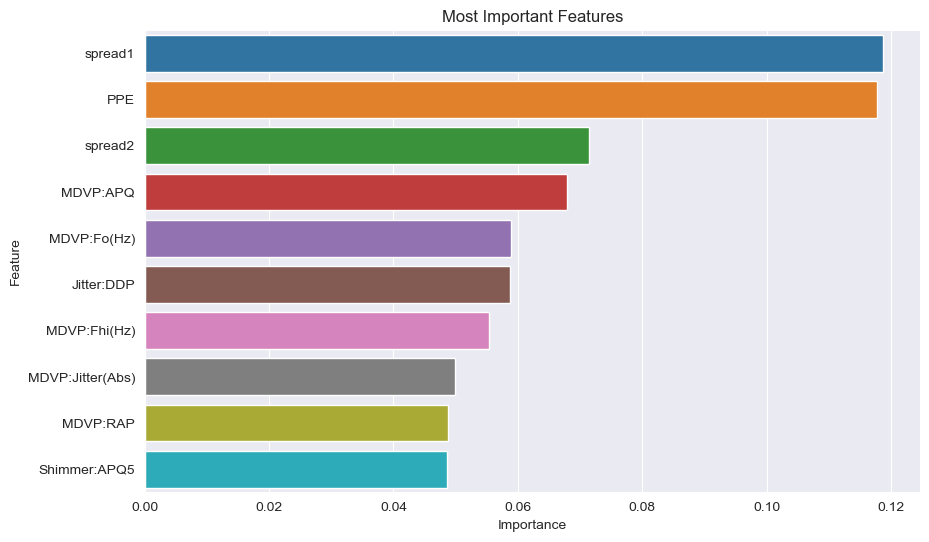

In [46]:
plt.figure(figsize=[10,6])
plt.title("Most Important Features")
sns.barplot(data=importance_df.head(10), y="Feature", x="Importance");

### Saving The Model

Random Forest had the best recall and F1 score so that would be our final model

In [49]:
joblib.dump(model, "Saved Models/model_joblib")

['Saved Models/model_joblib']

Building a Predictive System

In [57]:
input_data = (119.992
,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[1]
The Person has Parkinsons


C:\Users\public\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [58]:
import pickle

In [59]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [60]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [61]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
